# Capstone Project - The Battle of Neighborhoods (Week 2)
## Applied Data Science Capstone by IBM/Coursera

## Table of Contents

## Introduction - The Business Problem

According to the U.S. Census, the city of Denver in Colorado is the nineteenth most populous city in the U.S. as of 2010 and the largest municipality in the state of Colorado with an estimated population of 716,492 in 2018. It has experienced a population growth of 19.38% as of 2010 and makes it one of the fastest-growing major cities in the country. The city of Denver officially consists of 78 neighborhoods. Among these neighborhoods, there are many places to eat and that number will only continue to grow as the city expands. In any growing city, the vitality of a neighborhood depends on the venues and attractions that it holds and so in order to optimize growth, predicting good business placement is key. The type of venue of interest in this situation is restaurants.

Like any major city, Denver has a good number of neighborhoods, each with varying levels of foot traffic and frequentation. This makes it so certain neighborhoods will inevitably have greater numbers of venues, notably restaurants. There are neighborhoods that are known for their quality and quantity of restaurants, but as the city continues to grow, this statistic is set to change, which begs interesting questions. What types of cuisine are more prevalent among which neighborhoods? Are there neighborhoods that hold considerably more food places that specialize in certain cuisines? And if so, where would be good potential neighborhoods to open a restaurant of the most popular type?
This project aims to predict which neighborhoods in Denver would be favorable spots to open restaurants of the most popular type of cuisine based on the prevalence or lack of competition of that type of cuisine in that neighborhood. This will be based on which restaurants are the most frequented per neighborhood and the number of that type of restaurant in Denver. The project would provide actionable insights as to where that certain type of cuisine could thrive and in which neighborhood or neighborhoods. The insights would be influenced based on the number of existing restaurants in the neighborhood (any type of restaurant) and the existing frequency of that type of restaurant, if any, in that neighborhood.


## Data

Based on our definition of the problem, factors affecting our decisions:
- Number of restaurants in that neighborhood
- Number of types of restaurants in that neighborhood
- Which is the most common type of restaurant
- Frequency of the most popular type of restaurant per neighborhood

Essentially, any neighborhood in which the most common type of restaurant is not the most popular type in Denver and the frequency of the most popular type is low enough in that neighborhood makes it a good candidate to open a restaurant of the most popular type. I have decided to filter the venues by only those that hold the word "restaurant" or a related word in the venue category description as they are specific in being restaurants by description. I will also omit fast food chains in this filter as they could complicate true competitive insights as they are quite numerous and placed just about everywhere.

In [1]:
import pandas as pd
import numpy as np

Having imported pandas as a necessary package for dataframes, we can now import the csv file from the City of Denver's website listing all official neighborhoods of the city.

In [2]:
url = 'https://www.denvergov.org/media/gis/DataCatalog/statistical_neighborhoods/csv/statistical_neighborhoods.csv'
df = pd.read_csv(url)
df.rename(columns={'NBHD_ID':'Neighborhood ID', 'NBHD_NAME':'Neighborhood'}, inplace = True)
df.drop(['TYPOLOGY', 'NOTES'], axis = 1, inplace = True)
df.insert(2, 'Latitude', [39.7451, 39.6893, 39.7038, 39.7002, 39.7020, 39.7183, 39.7207, 39.7201, 39.7336, 39.7438, 
                          
                         39.6313, 39.6420, 39.7039, 39.7182, 39.7182, 39.7403, 39.7657, 39.7490, 39.7767, 39.7896,
                          
                         39.7874, 39.7620, 39.7040, 39.7057, 39.6604, 39.6785, 39.6713, 39.7335, 39.7178, 39.7317, 
                         39.7325, 39.7566, 39.7437, 39.6748, 39.6876, 39.6785, 39.6895, 39.6528, 39.6602, 39.6275,
                        39.6434, 39.6858, 39.6749, 39.6894, 39.6675, 39.6750, 39.6895, 39.7401, 39.7337, 39.7427,
                          39.7365, 39.7427, 39.7527, 39.7603, 39.7824, 39.7202, 39.7832, 39.6618, 39.6741, 39.7436,
                          39.7365, 39.7169, 39.7306, 39.7581, 39.7840, 39.6598, 39.7512, 39.7731, 39.7838, 39.7148,
                          39.7681, 39.7581, 39.7337, 39.7587, 39.7688, 39.7040, 39.7778, 39.8561,
                         ])
df.insert(3, 'Longitude', [-105.0095, -104.9501, -104.9500, -104.9640, -104.9793, -104.9791, -104.9476, -104.9667, -104.9496, -104.9501,
                           
                          -105.0952, -105.0470, -104.9147, -105.0325, -105.0470, -105.0393, -105.0417, -105.0484, -105.0393, -105.0299,
                           
                         -105.0112, -105.0125, -105.0110, -104.8903, -104.9506, -104.9653, -104.9829, -104.9644, -104.9222, -104.9128,
                           -104.9305, -104.9223, -104.9125, -104.9508, -104.9805, -104.9899, -105.0157, -104.8684, -104.9024, -104.9111,
                           -104.8940, -104.8965, -104.9130, -104.9224, -104.9316, -105.0417, -105.0391, -104.8929, -104.9799, -104.9812,
                          -104.9900, -104.9885, -105.0017, -104.8908, -104.8470, -104.8922, -104.7579, -105.0351, -105.0046, -104.9652,
                           -105.0218, -105.0184, -105.0395, -104.9874, -104.9901, -105.0673, -105.0205, -104.9127, -104.9593, -104.9964,
                           -104.9499, -104.9499, -105.0028, -104.9652, -104.9652, -105.0431, -105.0119, -104.6737
                          ])
df.head()

,Neighborhood ID,Neighborhood,Latitude,Longitude
0,2,Auraria,39.7451,-105.0095
1,21,Cory - Merrill,39.6893,-104.9501
2,7,Belcaro,39.7038,-104.9500
3,70,Washington Park,39.7002,-104.9640
4,71,Washington Park West,39.7020,-104.9793


We will now use the information above to create a map of the general area to determine the scope of analysis throughout Denver, Colorado. So, we will now need to import a few things to create it and analyze it down the road.

In [4]:
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import requests 
from pandas.io.json import json_normalize
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [5]:
address = 'Denver, CO'
geolocator = Nominatim(user_agent="Denver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Denver, CO are {}, {}.'.format(latitude, longitude))

map_denver = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, nbhdID, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood ID'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, nbhdID)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_denver)  

The geograpical coordinate of Denver, CO are 39.7348381, -104.9653271.


In [6]:
map_denver

Now we've made a nice map of the Denver neighborhoods! Since the filter for venues will be circular around Denver, certain neighborhoods will have to be omitted from analysis. Those neighborhoods are Marston, Fort Logan, Windsor, Hampden South, Hampden, Gateway - Green Valley Ranch, College View, and DIA. 

Great! Now that we've removed the outlying neighborhoods, we can recreate a map to base our filter on.

Since we have created a grid with latitude and longitudes, we must now create a system to convert these into Cartesian coordinates as we will want to be able to determine distances between restaurants later on. And so we must now construct a system to enable to do this.

This seems like a good basis to start our analysis. Now that we have given a shape to our scope of analysis, we need to create a grid over Denver to find information on restaurants within our neighborhoods. We will add a very wide radius to find them and we will append them to a dictionary to account for duplicates. But we are only interested in places that specialize in being restaurants, thus coffee shops or breweries and similar categories of eateries will not be included as they are not direct competition. We will also omit fast food restaurants for reasons previously mentioned. And so we will include subcategories of restaurants that go by different names, such as pizza places or burger joints. 

In [7]:
CLIENT_ID = 'KII3AYVINSLPE4A012MJ2GQH4D0SGVMZJ25AIUNARCIPP4YL' 
CLIENT_SECRET = 'Q2L0GGGHYGQVG3RM4CXIN4Q2VJE4TCONZOSHYKFZEO5T52NP' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KII3AYVINSLPE4A012MJ2GQH4D0SGVMZJ25AIUNARCIPP4YL
CLIENT_SECRET:Q2L0GGGHYGQVG3RM4CXIN4Q2VJE4TCONZOSHYKFZEO5T52NP


In [8]:

LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=1200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
       
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
denvervenues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Auraria
Cory - Merrill
Belcaro
Washington Park
Washington Park West
Speer
Cherry Creek
Country Club
Congress Park
City Park
Marston
Fort Logan
Washington Virginia Vale
Barnum
Barnum West
West Colfax
West Highland
Sloan Lake
Berkeley
Regis
Chaffee Park
Highland
Athmar Park
Wellshire
University
Rosedale
Cheesman Park
Hilltop
Montclair
Hale
North Park Hill
South Park Hill
University Park
Platt Park
Overland
Ruby Hill
Kennedy
Hampden
Southmoor Park
Hampden South
Indian Creek
Goldsmith
University Hills
Harvey Park
Mar Lee
East Colfax
Capitol Hill
North Capitol Hill
Civic Center
CBD
Union Station
Stapleton
Montbello
Lowry Field
Gateway - Green Valley Ranch
Harvey Park South
College View - South Platte
City Park West
Sun Valley
Valverde
Villa Park
Five Points
Globeville
Bear Valley
Virginia Village
Windsor
Jefferson Park
Northeast Park Hill
Elyria Swansea
Baker
Clayton
Skyland
Lincoln Park
Whittier
Cole
Westwood
Sunnyside
DIA


In [10]:
print(denvervenues.shape)
print('There are {} uniques categories.'.format(len(denvervenues['Venue Category'].unique())))
denvervenues.head()

(4625, 7)
There are 330 uniques categories.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Auraria,39.7451,-105.0095,Tivoli Brewing Company,39.745494,-105.005475,Brewery
1,Auraria,39.7451,-105.0095,Pepsi Center,39.748608,-105.007571,Stadium
2,Auraria,39.7451,-105.0095,SpringHill Suites Denver Downtown,39.747537,-105.003805,Hotel
3,Auraria,39.7451,-105.0095,Mind Eraser,39.749562,-105.013887,Theme Park Ride / Attraction
4,Auraria,39.7451,-105.0095,Children's Museum of Denver,39.748707,-105.017061,Museum


Looking at this dataframe, we can see it reveals the overlapping issue with the filter of 1200 meters we applied. Barnum and Barnum West have the same most common venues as they are relatively close and the filter did not incorporate a way to avoid this. There are most likely other cases where this happens in the dataframe. While this can be seen as a limitation, it is interesting and worth considering that closeness in neighborhoods should not remove any significance of the presence of a venue in more than one neighborhood. The filter mainly addresses the probability of missing out on important venues in neighborhoods because they are larger.

And so from this, we can see that restaurants already tend to have the highest occurences around nearly all neighborhoods, each neighborhood having at least one case of restaurants appearing their top 5 venues.
So with the little insight on this, we can now filter these venues into a new dataframe using the key words that define places to eat, such as the words: restaurant, bistro, bar, place, joint, brewery, and spot.

In [11]:
word1 = 'Restaurant'
word2 = 'Burger'
word3 = 'Pizza'
word4 = 'Tavern'
word5 = 'Sushi'
word6 = 'Steakhouse'
filteredvenues1 = denvervenues[denvervenues['Venue Category'].str.contains(word1)]
filteredvenues2 = denvervenues[denvervenues['Venue Category'].str.contains(word2)]
filteredvenues3 = denvervenues[denvervenues['Venue Category'].str.contains(word3)]
filteredvenues4 = denvervenues[denvervenues['Venue Category'].str.contains(word4)]
filteredvenues5 = denvervenues[denvervenues['Venue Category'].str.contains(word5)]
filteredvenues6 = denvervenues[denvervenues['Venue Category'].str.contains(word6)]

filteredvenues = [filteredvenues1, filteredvenues2, filteredvenues3, filteredvenues4, filteredvenues5, filteredvenues6]

filteredvenues = pd.concat(filteredvenues).drop_duplicates().reset_index(drop=True)
filteredvenues
print('There are {} uniques categories.'.format(len(filteredvenues['Venue Category'].unique())))

There are 48 uniques categories.


Now that we have filtered all places with the correct labels in the venue category section that would make them restaurants, we want to remove Fast Food establishments from the dataframe as that type of restaurant is not of interest in this project. Doing so will give us a proper pool of information to step in exploratory analysis.

In [12]:
filteredvenues = filteredvenues[~filteredvenues['Venue Category'].str.contains("Fast Food Restaurant")]
print('There are {} uniques categories.'.format(len(filteredvenues['Venue Category'].unique())))
filteredvenues.head()

There are 47 uniques categories.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Auraria,39.7451,-105.0095,Euclid Hall Bar & Kitchen,39.747577,-105.000243,American Restaurant
1,Auraria,39.7451,-105.0095,Domo Japanese Country Foods Restaurant,39.738100,-105.005650,Japanese Restaurant
2,Auraria,39.7451,-105.0095,Rhein Haus,39.748346,-105.000537,German Restaurant
3,Auraria,39.7451,-105.0095,Coohills,39.750764,-105.003832,French Restaurant
4,Auraria,39.7451,-105.0095,Bistro Vendome,39.747586,-104.999066,French Restaurant


# Exploratory Data Analysis

Now that we have all the restaurants we will be working with, let's do some analysis. We will start by displaying different insights regarding restaurants in the neighborhoods of Denver. We will look at the number of unique categories of restaurants per neighborhood in Denver, and then display the number of restaurants of unique types per neighborhood. We will also display the number of restaurants per neighborhood. Displaying this information will help us move forward in interpreting this information when we apply one hot encoding to measure the frequency of types of restaurants per neighborhood to establish which type is the most popular.

In [13]:
print('Unique Categories per Neighborhood')
print('----------------------------------')
print(filteredvenues.groupby("Neighborhood", sort=False)['Venue Category'].nunique())

print('------------------------------------------------------')
print('Number of Restaurants of Certain Type per Neighborhood')
print('------------------------------------------------------')
print(filteredvenues.groupby("Neighborhood", sort=False)['Venue Category'].value_counts())

print('--------------------------------------')
print('Number of Restaurants per Neighborhood')
print('--------------------------------------')
print(filteredvenues.groupby(['Neighborhood'], sort = False)['Neighborhood'].count())

print('----------------------------------')
print('Number of Restaurants per Category')
print('----------------------------------')
print(filteredvenues['Venue Category'].value_counts())

Unique Categories per Neighborhood
----------------------------------
Neighborhood
Auraria                         17
Cory - Merrill                   4
Belcaro                         11
Washington Park                  3
Washington Park West            11
Speer                           15
Cherry Creek                    15
Country Club                    11
Congress Park                   12
City Park                       14
Marston                          5
Fort Logan                       1
Washington Virginia Vale        12
Barnum                           6
Barnum West                      2
West Colfax                      3
West Highland                   12
Sloan Lake                       8
Berkeley                        14
Regis                            4
Chaffee Park                     3
Highland                        16
Athmar Park                      5
Wellshire                        1
University                       4
Rosedale                        11
Cheesma

We will now append the general information to our main dataframe where it is fitting to use for visualizations. This includes the number of restaurants per neighborhood as well as the number of categories per neighborhood. The additional two, the number of restaurants per category as well as the number of restaurants of a certain type per neighborhood are mainly for insight.

In [14]:
Number_of_restaurants = filteredvenues.groupby(['Neighborhood'], sort = False)['Venue'].count()
Number_of_categories = filteredvenues.groupby("Neighborhood", sort = False)['Venue Category'].nunique()

df1 = pd.DataFrame({"Number of Restaurants" : Number_of_restaurants, "Number of Categories" : Number_of_categories})

df = pd.merge(left = df, right = df1, how = 'right', left_on = 'Neighborhood', right_on = 'Neighborhood')
df.head()

,Neighborhood ID,Neighborhood,Latitude,Longitude,Number of Restaurants,Number of Categories
0,2,Auraria,39.7451,-105.0095,34,17
1,21,Cory - Merrill,39.6893,-104.9501,8,4
2,7,Belcaro,39.7038,-104.9500,16,11
3,70,Washington Park,39.7002,-104.9640,7,3
4,71,Washington Park West,39.7020,-104.9793,19,11


Now that we have appended this information to our main dataframe, let's visualize what this means. We'll make a bar chart showing the number of restaurants and the number of categories per neighborhood. Ideally, the longest bar displays the neighborhood with the most competition and diversity.

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

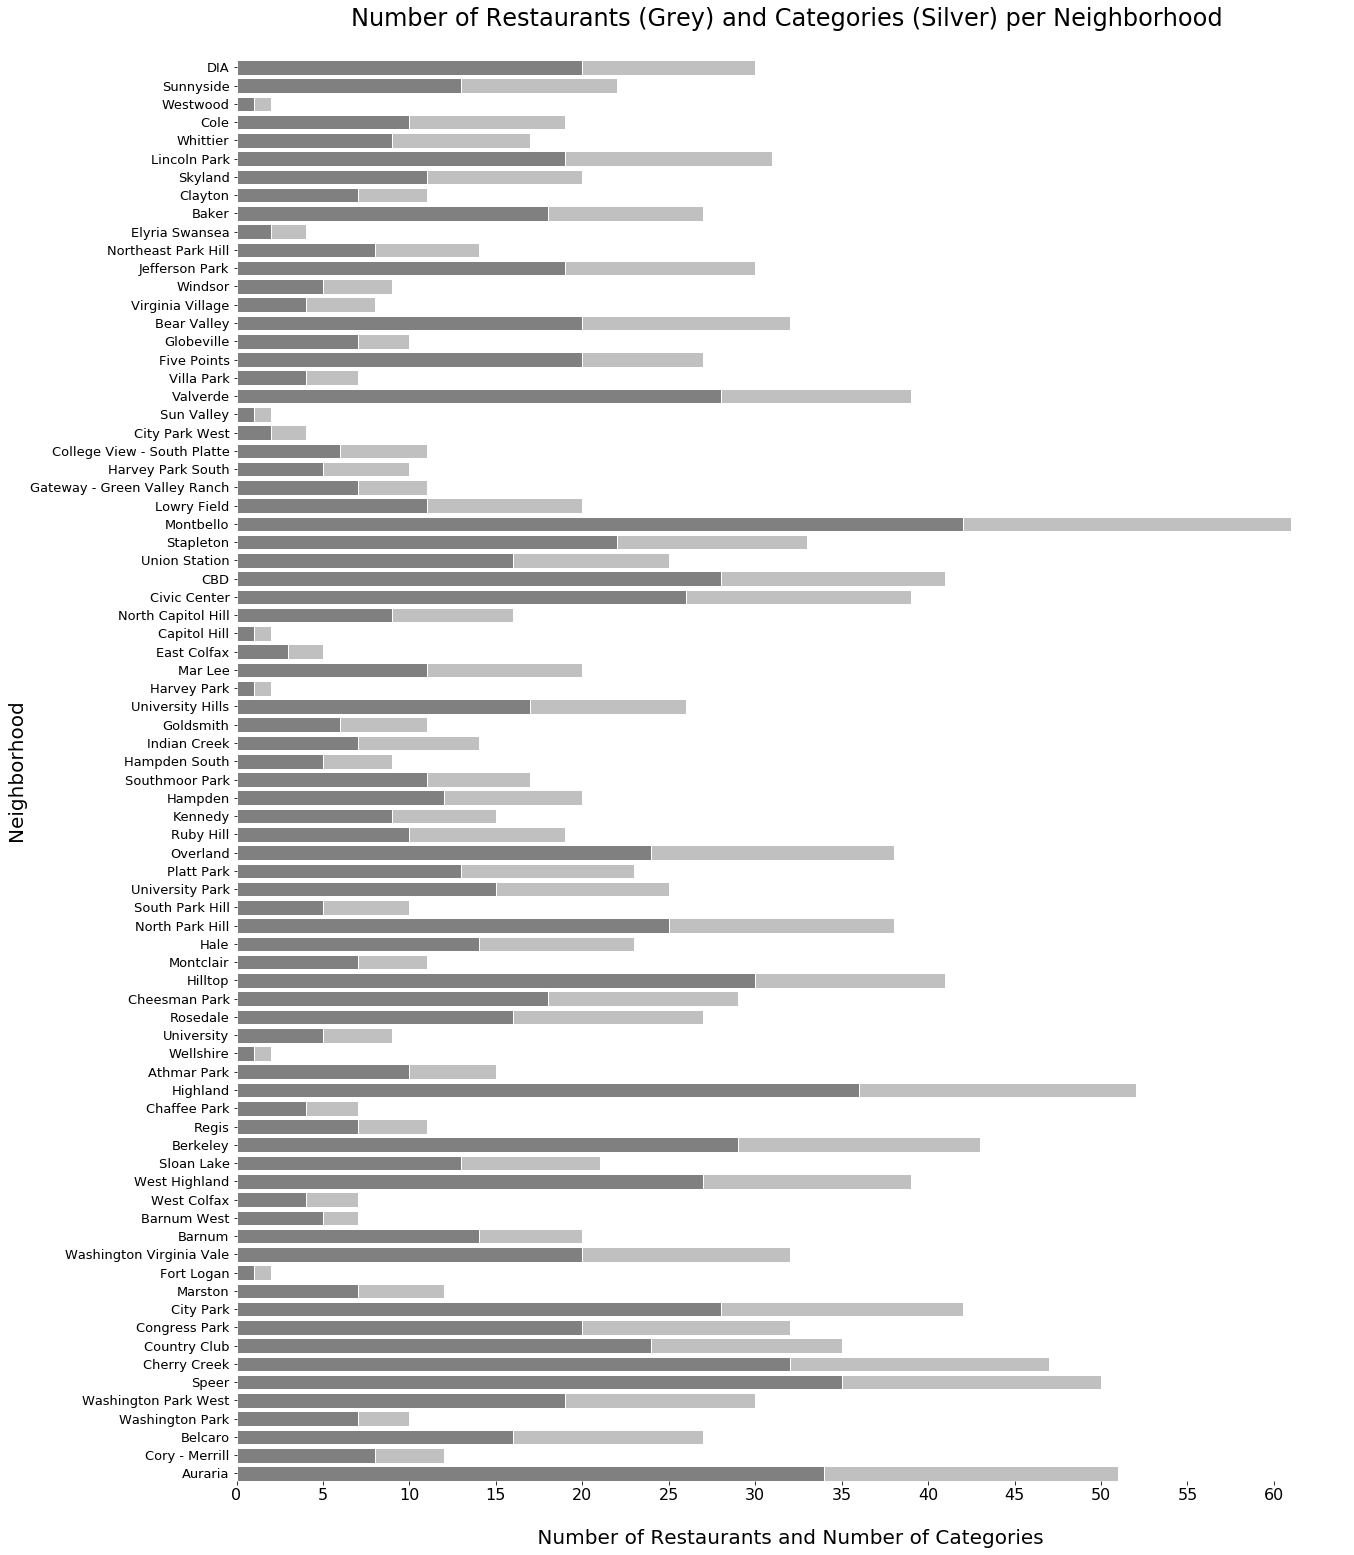

In [16]:
bargraphnbhds = df['Neighborhood']
numrestaurants = df['Number of Restaurants']
numtypes = df['Number of Categories']
bars = np.add(numrestaurants, numtypes).to_list()
#bars = numrestaurants + numtypes
barw = 6
N = 140

index = np.arange(len(bargraphnbhds))
plt.title('Number of Restaurants (Grey) and Categories (Silver) per Neighborhood \n   ', fontsize= 24)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.gca().margins(y=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_yticklabels()
maxsize = max([t.get_window_extent().height for t in tl])
m = 0.2
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

b1 = plt.gcf().subplots_adjust(bottom=margin, top=5.-margin)
b2 = plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])


plt.barh(index, numrestaurants, color='grey', edgecolor = 'white', align='center')
plt.barh(index, numtypes, left = numrestaurants, color='silver', edgecolor = 'white', align='center')
plt.xlabel(' \n Number of Restaurants and Number of Categories ', fontsize = 20)
plt.xticks(np.arange(0,65,5),fontsize = 16)
plt.ylabel('Neighborhood', fontsize = 20)
plt.yticks(np.arange(len(bargraphnbhds), step = 1), bargraphnbhds, fontsize = 13)
   
plt.show()

The bar chart above shows us that diversity is slightly less than the number of restaurants in relative proportion to the number of restaurants in a neighborhood. We should visualize how many restaurants of a certain type there are in all neighborhoods. If there are less than 9, they will be appeneded to the "others" category in the filteredvenues dataframe as they are insignificant in distribution and so unimportant to our analysis.

In [17]:
piechartnbhds = filteredvenues['Venue Category']
piechartnbhds1 = filteredvenues['Venue Category'].value_counts()
others = piechartnbhds1.index[piechartnbhds1 <= 9]
others
#This is the list of all restaurants types that are attributed to 'others' in the filteredvenues dataframe.

Index(['Tapas Restaurant', 'Dim Sum Restaurant', 'Ethiopian Restaurant',
       'Middle Eastern Restaurant', 'Latin American Restaurant',
       'Cajun / Creole Restaurant', 'Cuban Restaurant',
       'Southern / Soul Food Restaurant', 'Ramen Restaurant',
       'Korean Restaurant', 'Brazilian Restaurant',
       'Eastern European Restaurant', 'Tex-Mex Restaurant',
       'Caribbean Restaurant', 'Argentinian Restaurant',
       'Modern European Restaurant', 'German Restaurant',
       'South American Restaurant', 'Arepa Restaurant', 'Malay Restaurant',
       'Szechuan Restaurant', 'Hawaiian Restaurant', 'Lebanese Restaurant',
       'Israeli Restaurant', 'Comfort Food Restaurant', 'African Restaurant',
       'Moroccan Restaurant'],
      dtype='object')

In [18]:
filteredvenues.loc[filteredvenues['Venue Category'].isin(others), "Venue Category"] = "Other"
filteredvenues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Auraria,39.7451,-105.0095,Euclid Hall Bar & Kitchen,39.747577,-105.000243,American Restaurant
1,Auraria,39.7451,-105.0095,Domo Japanese Country Foods Restaurant,39.738100,-105.005650,Japanese Restaurant
2,Auraria,39.7451,-105.0095,Rhein Haus,39.748346,-105.000537,Other
3,Auraria,39.7451,-105.0095,Coohills,39.750764,-105.003832,French Restaurant
4,Auraria,39.7451,-105.0095,Bistro Vendome,39.747586,-104.999066,French Restaurant


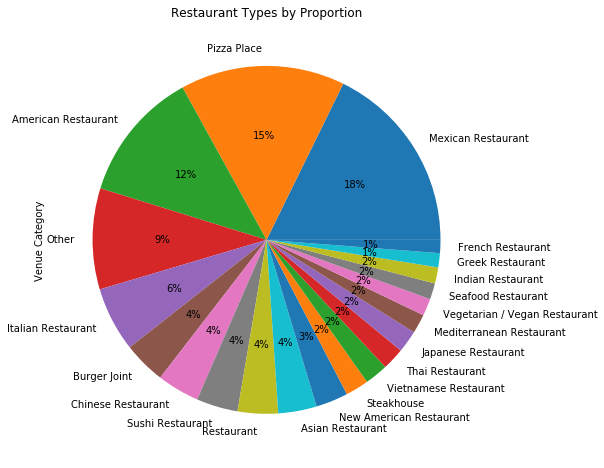

In [19]:
piecharttitle = "Restaurant Types by Proportion"
filteredvenues['Venue Category'].value_counts().plot(kind='pie', figsize = (8,8), title = piecharttitle, autopct='%1.0f%%')

This pie chart gives us valuable insight on numbers of types of restaurants. It also tells us that categorization of the dataframe is not wholly correct - there types that are the same but described differently in the dataframe. For example, sushi restaurants are equivalent to japanese restaurants since sushi is japanese cuisine. The same logic applies to american restaurants (new american restaurants count as american restaurants). Unlabelled types fall into the "Other" category as they do not have a specified type and are then insignificant to our analysis. Let's correct those and redisplay our pie chart.

In [20]:
#Edit this every time you run this notebook due to FourSquare detecting different numbers every time.
japanrestaurants = 41
amrestaurants = 32
others = 40
piechartnbhds1 = filteredvenues['Venue Category'].value_counts()
others = piechartnbhds1.index[piechartnbhds1 == 40]
amrestaurants = piechartnbhds1.index[piechartnbhds1 == 32]
japanrestaurants = piechartnbhds1.index[piechartnbhds1 == 41]

In [21]:
filteredvenues.loc[filteredvenues['Venue Category'].isin(others), "Venue Category"] = "Other"
filteredvenues.loc[filteredvenues['Venue Category'].isin(japanrestaurants), "Venue Category"] = "Japanese Restaurant"
filteredvenues.loc[filteredvenues['Venue Category'].isin(amrestaurants), "Venue Category"] = "American Restaurant"
print('----------------------------------')
print('Number of Restaurants per Category')
print('----------------------------------')
print(filteredvenues['Venue Category'].value_counts())

----------------------------------
Number of Restaurants per Category
----------------------------------
Mexican Restaurant               189
Pizza Place                      163
American Restaurant              162
Other                            140
Italian Restaurant                64
Japanese Restaurant               63
Burger Joint                      42
Chinese Restaurant                42
Asian Restaurant                  38
Steakhouse                        23
Vietnamese Restaurant             23
Thai Restaurant                   22
Mediterranean Restaurant          19
Vegetarian / Vegan Restaurant     17
Indian Restaurant                 16
Seafood Restaurant                16
Greek Restaurant                  14
French Restaurant                 13
Name: Venue Category, dtype: int64


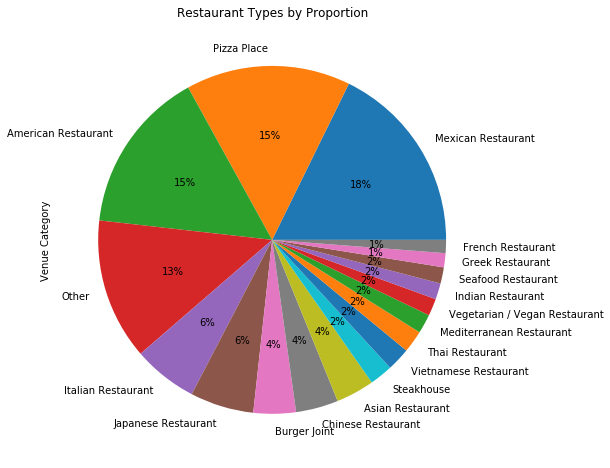

In [22]:
filteredvenues['Venue Category'].value_counts().plot(kind='pie', figsize = (8,8), title = piecharttitle, autopct='%1.0f%%')

This pie chart gives us vastly more insight into our data. According to it, Mexican restaurants still lead, but American restaurants have now surpassed pizza places. While pizza places could be considered italian restaurants, pizza has culturally developped to be both american and italian cuisine which makes it vague and difficult to correctly label. Due to that, it will not be attributed to Italian restaurants. We will now highlight the presence of the leading type in the number of restaurants per neighborhood.

In [23]:
mexres = filteredvenues[filteredvenues['Venue Category'].str.contains("Mexican Restaurant")]
nummexres = mexres.groupby(['Neighborhood'], sort = False)['Venue Category'].count()
mexdf = pd.DataFrame({"Number of Mexican Restaurants" : nummexres})

df = pd.merge(left = df, right = mexdf, how = 'right', left_on = 'Neighborhood', right_on = 'Neighborhood')
df.drop(['Number of Restaurants', 'Number of Categories'], axis = 1, inplace = True)
df1 = pd.DataFrame({"Number of Restaurants" : Number_of_restaurants, "Number of Categories" : Number_of_categories})
df = pd.merge(left = df, right = df1, how = 'right', left_on = 'Neighborhood', right_on = 'Neighborhood')
df['Number of Mexican Restaurants'].fillna(0, inplace = True)
df.head()

,Neighborhood ID,Neighborhood,Latitude,Longitude,Number of Mexican Restaurants,Number of Restaurants,Number of Categories
0,2.0,Auraria,39.7451,-105.0095,3.0,34,17
1,21.0,Cory - Merrill,39.6893,-104.9501,4.0,8,4
2,7.0,Belcaro,39.7038,-104.9500,2.0,16,11
3,71.0,Washington Park West,39.7020,-104.9793,4.0,19,11
4,59.0,Speer,39.7183,-104.9791,7.0,35,15


We've now appended a category to the main dataframe containing the number of mexican restaurants per neighborhood. We will now visualize this in comparison to the number of restaurants per neighborhood.

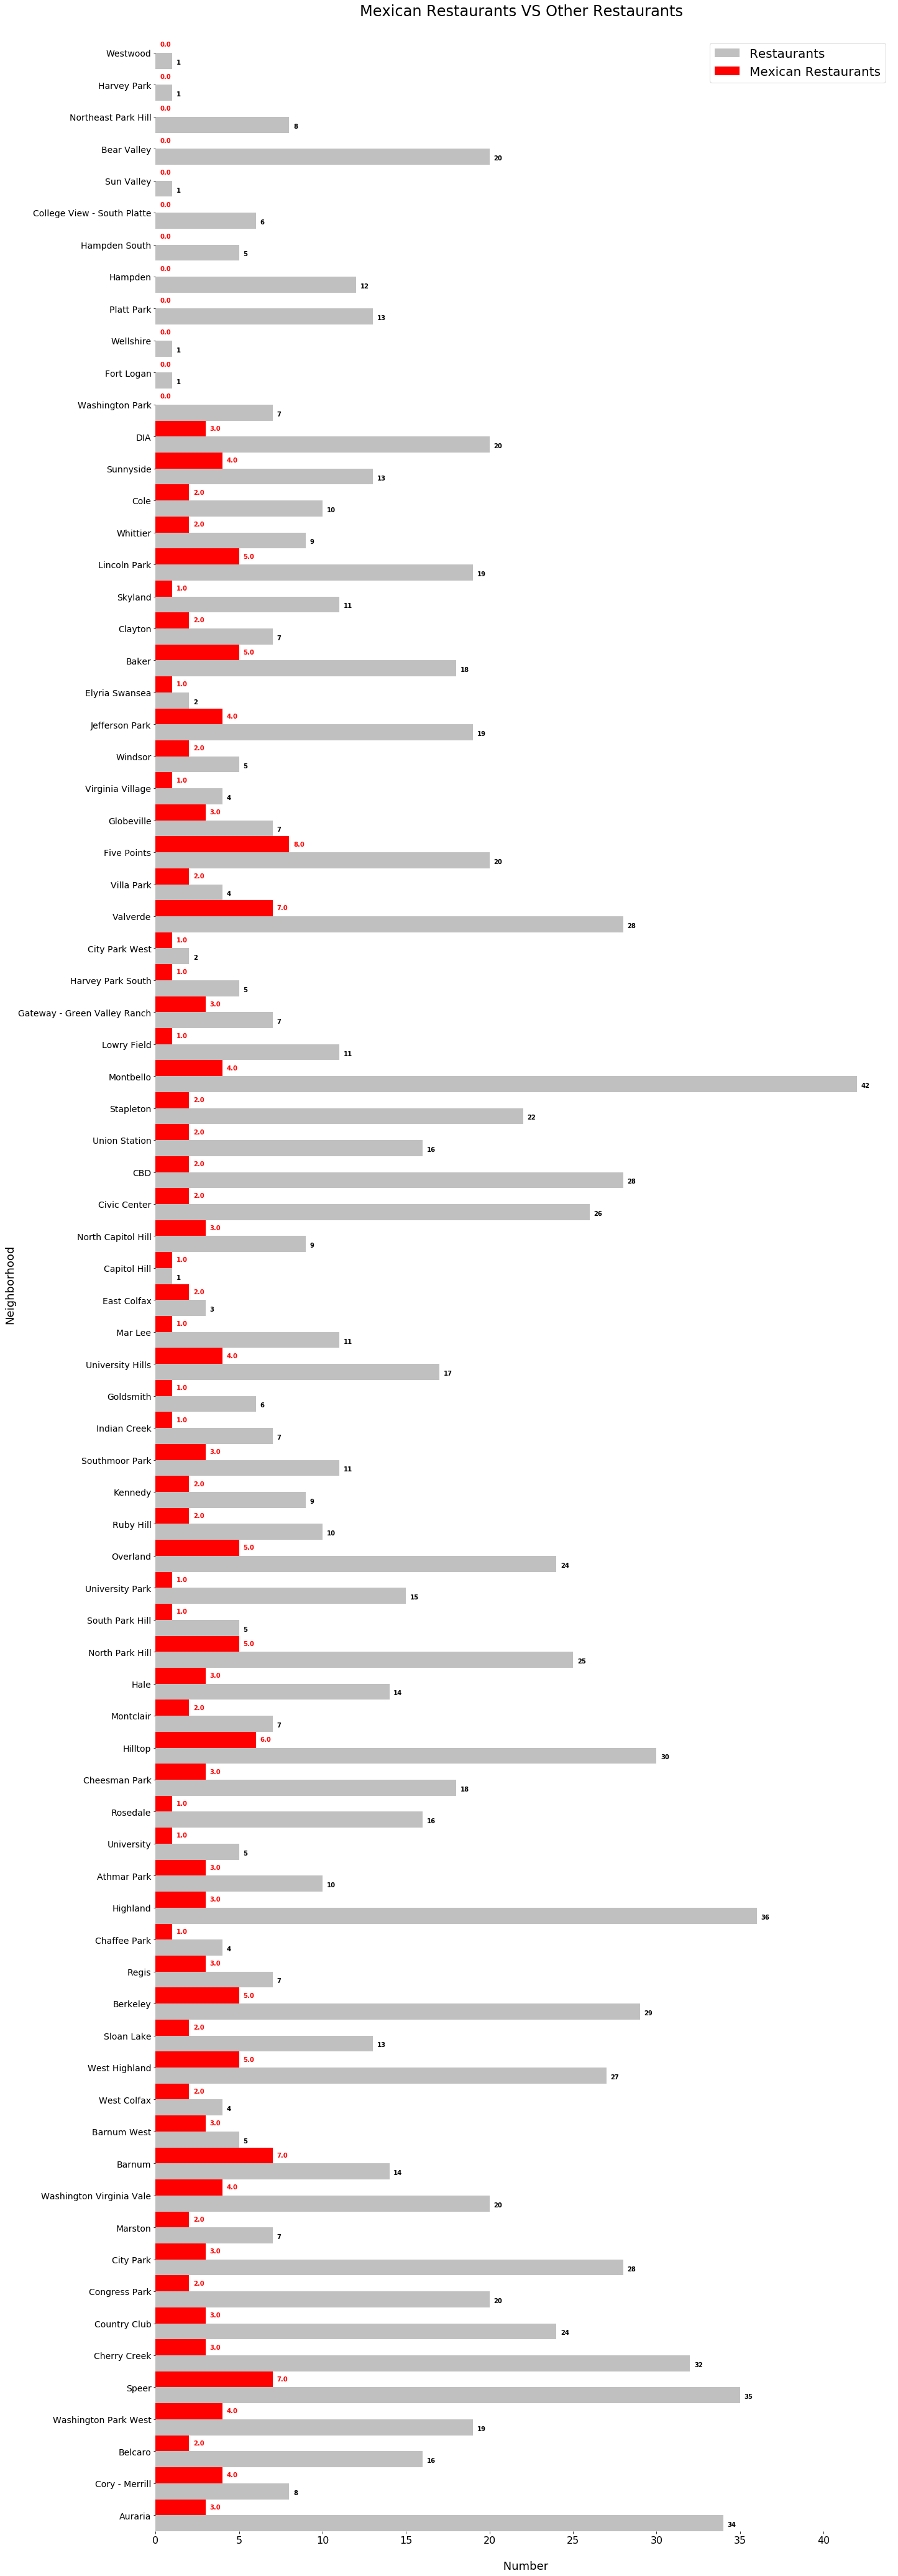

In [24]:
bargraphnbhds1 = df['Neighborhood']
numrestaurants = df['Number of Restaurants']
nummex = df['Number of Mexican Restaurants'] 


index = np.arange(len(bargraphnbhds1))
height = 0.5 
N = 150
fig, ax = plt.subplots()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.gca().margins(y=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_yticklabels()
maxsize = max([t.get_window_extent().height for t in tl])
m = 0.2
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(bottom=margin, top=14.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

ax.barh(index - height/2, numrestaurants, height, label='Restaurants', color = 'silver')
ax.barh(index + height/2, nummex, height, label='Mexican Restaurants', color = 'red')

ax.set_ylabel('Neighborhood', fontsize = 18)
ax.set_xlabel('\n Number', fontsize = 18)
ax.set_title('Mexican Restaurants VS Other Restaurants \n', fontsize = 24)
ax.set_yticks(index)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 16)
ax.set_yticklabels(bargraphnbhds1)
ax.legend(fontsize = 20)
for index, v in enumerate(numrestaurants):
    ax.text(v+0.25, index - .35, str(v), color='black', fontweight='bold')
for index, v in enumerate(nummex):
    ax.text(v+0.25, index + .20, str(v), color='red', fontweight='bold')

plt.show()

As we can see from these two bar graphs, there is much to be considered. There are neighborhoods that have no Mexican restaurants, despite having a large number of restaurants in the area. There are also some neighborhoods that significantly surpass others in number of restaurants. There are some neighborhoods with diversity nearly matching the number of restaurants. This suggests that competitiveness in a neighborhood is not necessarily bound to greater diversity, even though one could assume so at first. This can be interpreted as mildly competitive areas generally have room for one more restaurant, if it is of the most popular type. While an area like Montbello may not be a favorable place to place a restaurant due to greater competition, it can be said that a neighborhood with a reasonable amount of restaurants has good potential to open a new restaurant of the most popular type. And so, we need to determine what the most frequent type of cuisine is per neighborhood to know what the most popular type of cuisine is in Denver. We're going to use a bit of one hot encoding on the information we currently have to figure this out.

In [25]:
denveronehot = pd.get_dummies(filteredvenues[['Venue Category']], prefix="", prefix_sep="")

denveronehot['Neighborhood'] = filteredvenues['Neighborhood'] 

fixed_columns = [denveronehot.columns[-1]] + list(denveronehot.columns[:-1])
denveronehot = denveronehot[fixed_columns]

denvergrouped = denveronehot.groupby('Neighborhood').mean().reset_index()
denvergrouped.head()

,Neighborhood,American Restaurant,Asian Restaurant,Burger Joint,Chinese Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Other,Pizza Place,Seafood Restaurant,Steakhouse,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Athmar Park,0.000000,0.100000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.300000,0.200000,0.100000,0.000000,0.000000,0.0,0.0,0.300000
1,Auraria,0.264706,0.058824,0.000000,0.029412,0.058824,0.0,0.0,0.058824,0.088235,0.029412,0.088235,0.147059,0.058824,0.058824,0.058824,0.0,0.0,0.000000
2,Baker,0.166667,0.111111,0.000000,0.111111,0.000000,0.0,0.0,0.000000,0.055556,0.000000,0.277778,0.166667,0.111111,0.000000,0.000000,0.0,0.0,0.000000
3,Barnum,0.000000,0.000000,0.071429,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.500000,0.214286,0.000000,0.000000,0.071429,0.0,0.0,0.142857
4,Barnum West,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


We will now look at the distribution of frequencies within each neighborhood to give us an idea of diversity ratios per neighborhood.

In [26]:
numberoftopvenues = 5

for hood in denvergrouped['Neighborhood']:
    print("----"+hood+"----")
    temp = denvergrouped[denvergrouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(numberoftopvenues))
    print('\n')

----Athmar Park----
                   venue  freq
0  Vietnamese Restaurant   0.3
1     Mexican Restaurant   0.3
2                  Other   0.2
3       Asian Restaurant   0.1
4            Pizza Place   0.1


----Auraria----
                 venue  freq
0  American Restaurant  0.26
1                Other  0.15
2   Mexican Restaurant  0.09
3  Japanese Restaurant  0.09
4           Steakhouse  0.06


----Baker----
                 venue  freq
0   Mexican Restaurant  0.28
1  American Restaurant  0.17
2                Other  0.17
3   Chinese Restaurant  0.11
4          Pizza Place  0.11


----Barnum----
                   venue  freq
0     Mexican Restaurant  0.50
1                  Other  0.21
2  Vietnamese Restaurant  0.14
3           Burger Joint  0.07
4             Steakhouse  0.07


----Barnum West----
                           venue  freq
0             Mexican Restaurant   0.6
1            American Restaurant   0.4
2               Asian Restaurant   0.0
3  Vegetarian / Vegan Restauran



----Lowry Field----
                 venue  freq
0                Other  0.18
1          Pizza Place  0.18
2  American Restaurant  0.09
3         Burger Joint  0.09
4   Chinese Restaurant  0.09


----Mar Lee----
                      venue  freq
0  Mediterranean Restaurant  0.18
1               Pizza Place  0.18
2       Japanese Restaurant  0.18
3         Indian Restaurant  0.09
4                     Other  0.09


----Marston----
                 venue  freq
0   Mexican Restaurant  0.29
1          Pizza Place  0.29
2  American Restaurant  0.14
3   Chinese Restaurant  0.14
4   Italian Restaurant  0.14


----Montbello----
                 venue  freq
0  American Restaurant  0.29
1                Other  0.19
2   Mexican Restaurant  0.10
3   Seafood Restaurant  0.07
4          Pizza Place  0.07


----Montclair----
                 venue  freq
0          Pizza Place  0.43
1   Mexican Restaurant  0.29
2         Burger Joint  0.14
3   Italian Restaurant  0.14
4  American Restaurant  0.00




In [27]:
def restaurantfrequencies(row, numberoftopvenues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:numberoftopvenues]

In [28]:
indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']

for ind in np.arange(numberoftopvenues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))


neighborhooddiversity = pd.DataFrame(columns=columns)
neighborhooddiversity['Neighborhood'] = denvergrouped['Neighborhood']

for ind in np.arange(denvergrouped.shape[0]):
    neighborhooddiversity.iloc[ind, 1:] = restaurantfrequencies(denvergrouped.iloc[ind, :], numberoftopvenues)


neighborhooddiversity.head()

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant
0,Athmar Park,Vietnamese Restaurant,Mexican Restaurant,Other,Asian Restaurant,Pizza Place
1,Auraria,American Restaurant,Other,Mexican Restaurant,Japanese Restaurant,Seafood Restaurant
2,Baker,Mexican Restaurant,American Restaurant,Other,Asian Restaurant,Chinese Restaurant
3,Barnum,Mexican Restaurant,Other,Vietnamese Restaurant,Steakhouse,Burger Joint
4,Barnum West,Mexican Restaurant,American Restaurant,Italian Restaurant,Asian Restaurant,Burger Joint


In [29]:
first = neighborhooddiversity['1st Most Common Restaurant'].value_counts()
print("The Most Common Type of Restaurants by Occurence in Neighborhood")
print("----------------------------------------------------------------")
print(first)

The Most Common Type of Restaurants by Occurence in Neighborhood
----------------------------------------------------------------
American Restaurant      24
Pizza Place              19
Mexican Restaurant       18
Other                     8
Vietnamese Restaurant     3
Japanese Restaurant       2
Steakhouse                2
Italian Restaurant        1
Burger Joint              1
Name: 1st Most Common Restaurant, dtype: int64


This result is interesting. Even though Mexican restaurants outnumber other types by a significant amount, they are more localized and concentrated in certain neighborhoods as we can see from the result of one-hot encoding, making it so that it is not the most common venue per neighborhood. This is good, as this means we now have potential neighborhoods we could locate a new Mexican restaurant. The next step here would be to outline the neighborhoods where Mexican restaurants are not the most common. To do this, we will merge the "1st most common restaurant" column of the neighborhooddiversity dataframe with our main dataframe. 

In [30]:
mcr = neighborhooddiversity
mcr.drop(['2nd Most Common Restaurant', '3rd Most Common Restaurant', '4th Most Common Restaurant', '5th Most Common Restaurant'], axis = 1, inplace = True)
mcr.head()

,Neighborhood,1st Most Common Restaurant
0,Athmar Park,Vietnamese Restaurant
1,Auraria,American Restaurant
2,Baker,Mexican Restaurant
3,Barnum,Mexican Restaurant
4,Barnum West,Mexican Restaurant


In [31]:
df = pd.merge(left = df, right = mcr, how = 'right', left_on = 'Neighborhood', right_on = 'Neighborhood')
df.head()

,Neighborhood ID,Neighborhood,Latitude,Longitude,Number of Mexican Restaurants,Number of Restaurants,Number of Categories,1st Most Common Restaurant
0,2.0,Auraria,39.7451,-105.0095,3.0,34,17,American Restaurant
1,21.0,Cory - Merrill,39.6893,-104.9501,4.0,8,4,Mexican Restaurant
2,7.0,Belcaro,39.7038,-104.9500,2.0,16,11,Other
3,71.0,Washington Park West,39.7020,-104.9793,4.0,19,11,American Restaurant
4,59.0,Speer,39.7183,-104.9791,7.0,35,15,American Restaurant


The final step here is to add a column of ratios, namely the frequency value of Mexican restaurants. This would essentially give us the final insight necessary to determine if a neighborhood is a good place to locate a Mexican restaurant. With each neighborhood labelled with what the most common type of restaurant is and the frequency of Mexican restaurants, we will be able to determine which neighborhoods have acceptable conditions to place a new Mexican restaurant. That would be based on if the most common restaurant type is not Mexican, and if the frequency ratio is low enough to be considered a potentially competitive neighborhood.

In [32]:
mexfreq = denvergrouped[['Neighborhood', 'Mexican Restaurant']]
df = pd.merge(left = df, right = mexfreq, how = 'right', left_on = 'Neighborhood', right_on = 'Neighborhood')
df.rename(columns={'Mexican Restaurant':'Mexican Restaurant Frequency'}, inplace = True)
df.head()

,Neighborhood ID,Neighborhood,Latitude,Longitude,Number of Mexican Restaurants,Number of Restaurants,Number of Categories,1st Most Common Restaurant,Mexican Restaurant Frequency
0,2.0,Auraria,39.7451,-105.0095,3.0,34,17,American Restaurant,0.088235
1,21.0,Cory - Merrill,39.6893,-104.9501,4.0,8,4,Mexican Restaurant,0.500000
2,7.0,Belcaro,39.7038,-104.9500,2.0,16,11,Other,0.125000
3,71.0,Washington Park West,39.7020,-104.9793,4.0,19,11,American Restaurant,0.210526
4,59.0,Speer,39.7183,-104.9791,7.0,35,15,American Restaurant,0.200000


In [33]:
print(df.shape)

(78, 9)


We will now make a copy of the dataframe where we will remove all entries by the '1st Most Common Restaurant' category that contain 'Mexican Restaurant'. This is to remove all neighborhoods where placing a new Mexican restaurant would be redundant as it is already the most common type there. We will also remove all entries where the frequency of Mexican restaurants is greater than or equal to 0.125. This is to remove the neighborhoods where Mexican restaurants may not be the most common, but are dominant enough to complicate the effectiveness of placing a new Mexican restaurant there. We will also remove all neighborhoods where there are less than 10 restaurants. This is to remove neighborhoods that are not competitive in the restaurant industry and pose higher risk in placing a Mexican restaurant there.

In [34]:
potnbhds = df
potnbhds.drop(['Neighborhood ID'], axis = 1, inplace = True)
potnbhds = potnbhds[~potnbhds['1st Most Common Restaurant'].str.contains("Mexican Restaurant")]

badnbhds = potnbhds['Number of Restaurants']
toosmall = badnbhds.index[badnbhds < 10]
potnbhds = potnbhds[~potnbhds.index.isin(toosmall)]

badnbhds1 = potnbhds['Mexican Restaurant Frequency']
toocomp = badnbhds1.index[badnbhds1 >= 0.125]
potnbhds = potnbhds[~potnbhds.index.isin(toocomp)]

potnbhds.loc[69,'Latitude'] = 39.6748
potnbhds.loc[70,'Latitude'] = 39.6528
potnbhds.loc[74,'Latitude'] = 39.7581
potnbhds.loc[69,'Longitude'] = -104.9508
potnbhds.loc[70,'Longitude'] = -104.8684
potnbhds.loc[74,'Longitude'] = -104.9874

print(potnbhds.shape)
potnbhds


(17, 8)


,Neighborhood,Latitude,Longitude,Number of Mexican Restaurants,Number of Restaurants,Number of Categories,1st Most Common Restaurant,Mexican Restaurant Frequency
0,Auraria,39.7451,-105.0095,3.0,34,17,American Restaurant,0.088235
5,Cherry Creek,39.7207,-104.9476,3.0,32,15,American Restaurant,0.093750
7,Congress Park,39.7336,-104.9496,2.0,20,12,Italian Restaurant,0.100000
8,City Park,39.7438,-104.9501,3.0,28,14,American Restaurant,0.107143
19,Highland,39.7620,-105.0125,3.0,36,16,American Restaurant,0.083333
22,Rosedale,39.6785,-104.9653,1.0,16,11,Pizza Place,0.062500
29,University Park,39.7437,-104.9125,1.0,15,10,Pizza Place,0.066667
37,Mar Lee,39.6675,-104.9316,1.0,11,9,Japanese Restaurant,0.090909
41,Civic Center,39.7337,-104.9799,2.0,26,13,American Restaurant,0.076923
42,CBD,39.7427,-104.9812,2.0,28,13,American Restaurant,0.071429


In [35]:
map_potnbhds = folium.Map(location=[39.7348381, -104.9653271], zoom_start=13)

for lat, lng, neighborhood, nummexr, numrsts, numcates, mcrs, mrfs in zip(potnbhds['Latitude'], potnbhds['Longitude'], potnbhds['Neighborhood'], potnbhds['Number of Mexican Restaurants'], potnbhds['Number of Restaurants'], potnbhds['Number of Categories'], potnbhds['1st Most Common Restaurant'], potnbhds['Mexican Restaurant Frequency']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_potnbhds)  
    
map_potnbhds

# RESULTS AND DISCUSSION

Our analysis shows us that there are 17 neighborhoods in Denver that satisfy all statistical conditions to be optimal places to open up a new Mexican restaurant. These decisions were made by calculations based on a filter of 1200 meters from the center of each neighborhood that captured 4600+ venues at first, which we slimmed down to around 1000+ restaurants. Choosing the data features for the Venue Categories were vital to the analysis as it provided us with the range of possible restaurants to use in this project. As we can see from the map, the neighborhoods of focus are for the main part concentrated near the business center of Denver, Capitol Hill. This is great news as this is the busiest area of Denver, where socio-economic dynamics are optimal, and the wide range of diversity in the area makes it so a new restaurant would fit right in. 

I decided not to specify addresses and pinpointing potential locations within the neighborhoods as my capabilities are limited in those aspects and I wouldn't be able to decipher what is a realistic potential address from what could be in the middle of a building. I decided to leave that information for interpretation of the reader, who if interested would be keen to figure out a desirable spot within that neighborhood.

I also chose to remove neighborhoods with less than 10 restaurants as there are many reasons for a neighborhood to have little food venues. Those could be based on the structure of the neighborhood (if it is mainly residential, for example) or there could be important underlying reasons for the lack of food attractions. Anyways, I felt they would not be significant for analysis due to the many complications small numbers bring in making decisions on opening a new business.

# CONCLUSION

The purpose of this project was to identify which neighborhoods could be viable candidates to open a new restaurant of a certain type. This type of restaurant would be based on popularity, which was determined by the total number of those restaurants in Denver. The neighborhoods were to be picked based on their lack of the most popular type of restaurant, the number of other restaurants in the area which would suggest if or if not the neighborhood is busy enough to be viable, and whether the neighborhood had already existing restaurants of that type or not. Fast Food restaurants were removed from analysis since they can pretty much be placed around a city like darts thrown randomly at a target. This information in all would aid stakeholders or aspiring restaurant business owners in Denver to open up a restaurant with a promised audience in a busy area, yet without a threatening amount of competition. The restaurants used for analysis had all the information about them gathered through FourSquare and some calculations made above. 

The final component of such a decision, choosing the exact place in the neighborhood to open a restaurant, should be made entirely by the stakeholders or aspiring restaurant business owners.